In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/Cats and dogs/cats_vs_dogs_small'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

Mounted at /content/drive


In [4]:
# Function to create datasets with different training sizes
def create_generators(train_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    val_test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training')

    validation_generator = val_test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
    test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

    return train_generator, validation_generator, test_generator


In [5]:
# Train and evaluate models with different sample sizes
sample_sizes = [1000, 2000, 4000]  # Experimenting with different sizes
results = []

for size in sample_sizes:
    print(f"Training with sample size: {size}")
    train_generator, validation_generator, test_generator = create_generators(size)

Training with sample size: 1000
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Training with sample size: 2000
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Training with sample size: 4000
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
 # Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [8]:
 # Train model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 63/100 ━━━━━━━━━━━━━━━━━━━━ 2:32 4s/step - accuracy: 0.4930 - loss: 0.6943

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 529s 5s/step - accuracy: 0.4967 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.5328 - loss: 0.6878 - val_accuracy: 0.5500 - val_loss: 0.6851
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.5607 - loss: 0.6823 - val_accuracy: 0.5790 - val_loss: 0.6644
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.5700 - loss: 0.6780 - val_accuracy: 0.5800 - val_loss: 0.6675
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.6110 - loss: 0.6606 - val_accuracy: 0.6090 - val_loss: 0.6563
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.6037 - loss: 0.6611 - val_accuracy: 0.6420 - val_loss: 0.6407
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 242ms/step - accuracy: 0.6425 - loss: 0.6352 - val_accuracy: 0.6580 - val_loss: 0.6199
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.6732 - loss: 0.6293 - val_a

In [9]:
# Evaluate model from scratch
test_loss, test_acc = model.evaluate(test_generator)

# Save model from scratch
model_path = '/content/drive/MyDrive/Cats and dogs/cats_dogs_cnn.h5'
model.save(model_path)

# Transfer Learning with Pretrained Model (VGG16)
from tensorflow.keras.applications import VGG16

def build_transfer_learning_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # Freeze the convolutional base
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])
    return model

model_tl = build_transfer_learning_model()

# Train pretrained model
history_tl = model_tl.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50)

# Evaluate pretrained model
test_loss_tl, test_acc_tl = model_tl.evaluate(test_generator)

# Save pretrained model
model_tl_path = '/content/drive/MyDrive/Cats and dogs/cats_dogs_tl.h5'
model_tl.save(model_tl_path)

32/32 ━━━━━━━━━━━━━━━━━━━━ 237s 7s/step - accuracy: 0.7091 - loss: 0.5903


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 341ms/step - accuracy: 0.6563 - loss: 0.6367 - val_accuracy: 0.8560 - val_loss: 0.3609
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.7837 - loss: 0.4534 - val_accuracy: 0.8740 - val_loss: 0.3055
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.8078 - loss: 0.4226 - val_accuracy: 0.8870 - val_loss: 0.2802
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 248ms/step - accuracy: 0.8108 - loss: 0.4032 - val_accuracy: 0.8890 - val_loss: 0.2660
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - accuracy: 0.8265 - loss: 0.3891 - val_accuracy: 0.8810 - val_loss: 0.2660
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.8697 - loss: 0.2920


In [12]:
# Print results in a table format
print("\nComparison of Model Performance")
print("===================================")
print("{:<30} {:<15} {:<15}".format("Model", "Test Accuracy", "Test Loss"))
print("-----------------------------------")
print("{:<30} {:<15.4f} {:<15.4f}".format("CNN from Scratch", test_acc, test_loss))
print("{:<30} {:<15.4f} {:<15.4f}".format("Transfer Learning (VGG16)", test_acc_tl, test_loss_tl))


Comparison of Model Performance
Model                          Test Accuracy   Test Loss      
-----------------------------------
CNN from Scratch               0.7020          0.5914         
Transfer Learning (VGG16)      0.8720          0.2885         


In [13]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.7045 - loss: 0.5914
Test Accuracy: 0.7020000219345093


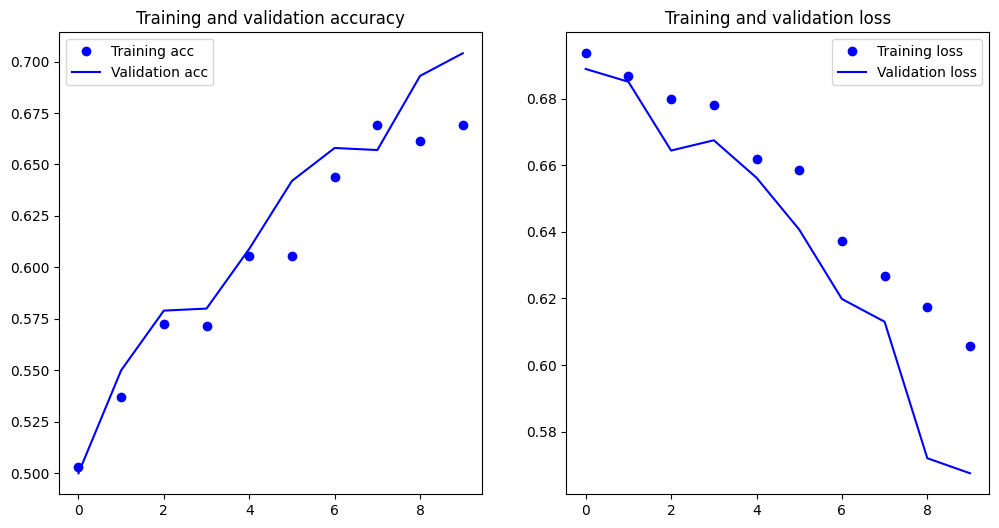

In [14]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

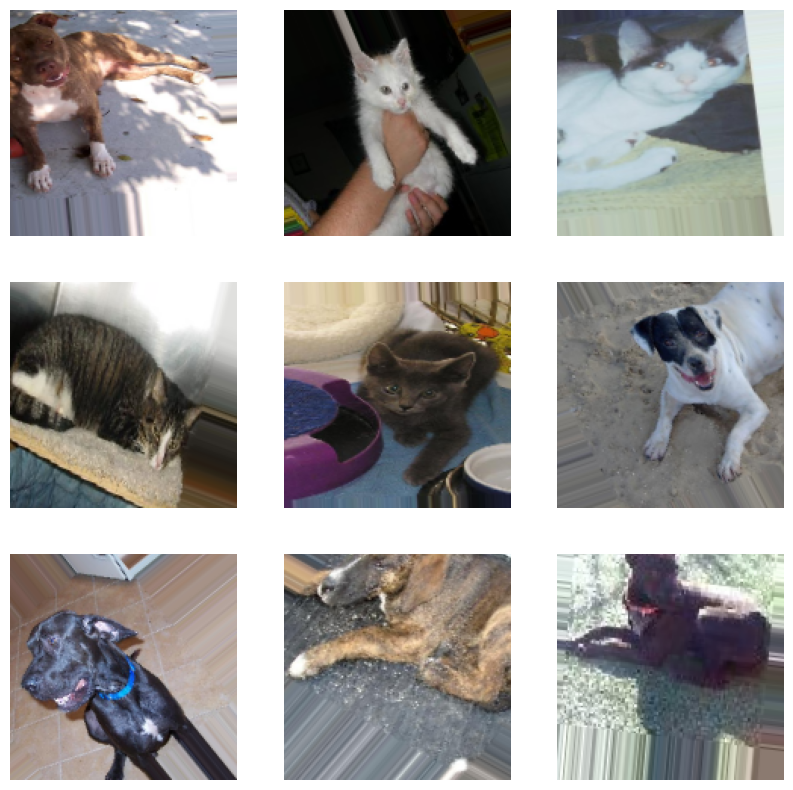

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the training set
train_images, _ = next(train_generator)  # Get first batch of images

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])  # Show image
    plt.axis("off")

plt.show()
